In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D
import os
import glob
import madmom
import matplotlib.patches as mpatches
import librosa
import librosa.display

from essentia import *
from essentia.standard import *
from scipy.stats.stats import pearsonr


In [69]:
filename = "samples/strings/cello_C6_05_mezzo-piano_arco-normal.mp3"
audio = MonoLoader(filename=filename, sampleRate=44100)()

def extractor(audio):
    # load our audio into an array

    # create the pool and the necessary algorithms
    pool = Pool()
    w = Windowing()
    spec = Spectrum()
    flatness = Flatness()
    flatnessDB = FlatnessDB()
    mfcc = MFCC()
    loudness = Loudness()

    # compute the centroid for all frames in our audio and add it to the pool
    for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512):
        s = spec(w(frame))
        f = flatness(s)
        fDB = flatnessDB(s)
        mfcc_bands, mfcc_coeffs = mfcc(s)
        l = loudness(frame)
        
        pool.add('flatness', f)
        pool.add('flatnessDB', fDB)
        pool.add('mfcc',  mfcc_coeffs)
        pool.add('loudness', l)


    # aggregate the results
    aggrpool = PoolAggregator(defaultStats = [ 'mean', 'stdev' ])(pool)

    return pool["mfcc"], pool["loudness"]

#Get y and sr
y, sr = audio, 44100
mfccs, loudness = extractor(audio)
mfccs = mfccs.T


[[ 0.          0.          0.34115648  0.31394345  0.35591045  0.44242364
   0.57306033  0.62005287  0.64115179  0.65458816  0.72247142  0.74673063
   0.82119268  0.86118579  0.93106413  0.90230834  0.92622036  0.96124339
   0.9417432   0.95103252  0.95394886  0.85981375  0.86897522  0.85430712
   0.8483336   0.94731933  0.97964978  1.          0.95055062  0.89074814
   0.89014024  0.92505205  0.92184216  0.88425308  0.9131642   0.92369872
   0.79487109  0.72385061  0.7716471   0.78413814  0.7395016   0.67109519
   0.60008019  0.45752692  0.36910665  0.30689436  0.25320441  0.1804882
   0.16306783  0.1440807   0.3279011   0.02375347  0.01502875  0.00624168
   0.        ]
 [ 0.          0.          0.81416476  0.58647954  0.66582453  0.72982532
   0.98267329  0.84207374  0.63424146  0.4675599   0.4548282   0.33634937
   0.44290853  0.38697487  0.56731081  0.38604307  0.33052185  0.48138592
   0.44618586  0.48946333  0.60416144  0.44663885  0.26029164  0.12056953
   0.4743911   0.4697440

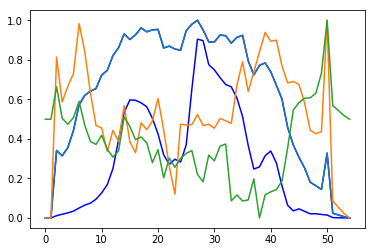

In [88]:

plt.plot(loudness, color="b")

def scaleVector(vector):
    min = np.min(vector)
    max = np.max(vector)
    range = max-min
    
    scaledData = (vector-min)/(range)
    
    return scaledData

for i in range(len(mfccs)):
    mfccs[i, :] = scaleVector(mfccs[i, :])
    
print mfccs

def plotMFCC(i, data, color=""):
    min = np.min(data)
    max = np.max(data)
    range = max-min
    
    scaledData = (data-min)/(range)
    print scaledData
    corr = pearsonr(data,loudness)
    label = "MFCC: %i, :%f" % (i, corr[0])
    print label
    
    if color != "":
        plt.plot(scaledData, label=label, color=color)
    plt.plot(scaledData, label=label)        
    
# plt.imshow(mfccs, origin="lower", aspect="auto")

plotMFCC(0, mfccs[0, :], color="b")
for i in range(1, 3):
    plotMFCC(i, mfccs[i, :])
    
plt.show()


